In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [6]:


event_frames = []
rec_frames = []
for day in range(1,28):
    event = pd.read_csv('/scratch-striped/mnanne/CSV/events/event_%d.csv' % day, delimiter='\t')
    rec = pd.read_csv('/scratch-striped/mnanne/CSV/recs/rec_%d_csv.gz' % day, delimiter='\t', compression='gzip')
    
    event_frames.append(event)
    rec_frames.append(rec)


/home/mnanne/Masterscriptie/newsreel-offline/recenv/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
print(event_1.columns)

Index(['BROWSER', 'ISP', 'OS', 'GEO_USER', 'TIME_WEEKDAY', 'POSITION',
       'DO_NOT_TRACK', 'WIDGET_KIND', 'WEATHER', 'GEO_PUBLISHER', 'LANG_USER',
       'POSITION_IN_WIDGET', 'SUBID', 'TIME_TO_ACTION', 'WIDGET_PAGE',
       'GEO_USER_ZIP', 'TIME_HOUR', 'USER_PUBLISHER_IMPRESSION', 'ITEM_SOURCE',
       'RETARGETING', 'PUBLISHER', 'USER_CAMPAIGN_IMPRESSION', 'SSP',
       'PIXEL_3RD_PARTY', 'GEO_USER_RADIUS', 'REDUCED_BID', 'ADBLOCKER',
       'BID_CPM', 'RELEASE', 'PRESENTDAY', 'WIDGET_ID', 'DIMENSION_SCREEN',
       'CONTEST_TEAM', 'ITEM_STATUS', 'PIXEL_4TH_PARTY', 'PUBLISHER_REFEER',
       'SSP_PUBLISHERID', 'DEVICE_TYPE', 'GEO_TYPE', 'TIME_MINUTE_30', 'CPO',
       'FILTER_ALLOWOSR', 'URL', 'SSP_QUALIFIER', 'SSP_NETWORK',
       'BROWSER_3RD_PARTY_SUPPORT', 'USER_COOKIE', 'TRANSPORT_PROTOCOL',
       'GENDER', 'AGE', 'INCOME', 'KEYWORD', 'ITEM_AGE', 'PUBLISHER_FILTER',
       'CHANNEL', 'CATEGORY', 'CATEGORY_SEM', 'CHANNEL_SEM', 'recs',
       'timestamp', 'type'],
      dtype=

In [98]:
print(len(event_1.columns))

60


In [2]:
event_1 = pd.concat(event_frames)
rec_1 = pd.concat(rec_frames)

NameError: name 'event_frames' is not defined

In [7]:
for i in range(0, len(event_frames)):
    event_frames[i].to_pickle('/scratch-striped/mnanne/event_%d_pickled' % i)
    rec_frames[i].to_pickle('/scratch-striped/mnanne/rec_%d_pickled' % i)

In [104]:
event_1.to_pickle('/scratch-striped/mnanne/events_pickled')

In [105]:
rec_1.to_pickle('/scratch-striped/mnanne/recs_pickled')

In [2]:
event_1 = pd.read_pickle('/scratch-striped/mnanne/events_pickled')
rec_1 = pd.read_pickle('/scratch-striped/mnanne/recs_pickled')

KeyboardInterrupt: 

In [2]:
print("start loading frames")
event_frames = []
rec_frames = []
for i in range(0, 27):
    print(i)
    event_frames.append(pd.read_pickle('/scratch-striped/mnanne/event_%d_pickled' % i))
    rec_frames.append(pd.read_pickle('/scratch-striped/mnanne/rec_%d_pickled' % i))

start loading frames
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [33]:
for category in rec_1.columns:
    print(category)

NameError: name 'rec_l' is not defined

In [39]:
rec_frames[0][['ITEM_SOURCE']]

,ITEM_SOURCE
0,257719281
1,257743374
2,257719281
3,246519047
4,257658449
5,257648161
6,257723108
7,257658449
8,257733260
9,257555828


In [36]:
counts_no_filter = rec_1[['USER_COOKIE', 'PUBLISHER']].groupby(['USER_COOKIE', 'PUBLISHER'])['USER_COOKIE']. \
count().reset_index(name="count").sort_values(by='count', ascending=False)
counts = counts_no_filter.query('count > 0 & USER_COOKIE != 0')

In [44]:
print(event_1.shape)

(2109313, 61)


In [49]:
ctr = []
num_recs = []
for i in range(1,50):
    counts = counts_no_filter.query('count == %s & USER_COOKIE != 0' % i)
    mask = event_1['USER_COOKIE'].isin(counts['USER_COOKIE'].values)
    ctr_value = event_1.loc[mask].shape[0]/len(counts['USER_COOKIE'].values)
    print("%d %d %f" % (i, len(counts), ctr_value ))
    ctr.append(event_1.loc[mask].shape[0]/len(counts['USER_COOKIE'].values))
    num_recs.append(i)

1 2317486 0.000070
2 1690161 0.000459
3 2013507 0.000323
4 444476 0.001269
5 231609 0.001762
6 518205 0.002096
7 143150 0.002487
8 120675 0.003124
9 206857 0.004157
10 89037 0.003437
11 59519 0.003679
12 118191 0.006591
13 50294 0.003499
14 43488 0.004691
15 68818 0.007905
16 37515 0.005145
17 27733 0.006454
18 48621 0.007960
19 24885 0.006510
20 22664 0.006663
21 33283 0.010846
22 20248 0.008100
23 16160 0.008849
24 26038 0.012635
25 14802 0.010472
26 14148 0.008270
27 19756 0.015084
28 13067 0.011556
29 10895 0.011290
30 16531 0.014518
31 10007 0.011792
32 9793 0.012356
33 13009 0.015451
34 9324 0.012119
35 7758 0.011988
36 11539 0.017766
37 7473 0.014987
38 7218 0.011638
39 9501 0.016946
40 6948 0.010794
41 6191 0.014860
42 8425 0.019822
43 5860 0.011263
44 5733 0.015873
45 7187 0.019897
46 5514 0.016685
47 4906 0.018141
48 6665 0.024756
49 4692 0.019608
50 4836 0.021712
51 5703 0.028757
52 4605 0.023670
53 4183 0.016973
54 5476 0.028123
55 3938 0.019553
56 4221 0.024876
57 4722 0.0

In [1]:
print(len(event_1['USER_COOKIE'].unique()))

NameError: name 'event_1' is not defined

In [9]:
print(rec_frames[0][['USER_COOKIE', 'PUBLISHER', 'ITEM_SOURCE']] \
.drop_duplicates(subset=['USER_COOKIE', 'ITEM_SOURCE']).query('USER_COOKIE != 0').shape) \

print(rec_frames[0].shape)

print(rec_frames[0][['USER_COOKIE', 'PUBLISHER', 'ITEM_SOURCE']] \
.drop_duplicates(subset=['USER_COOKIE', 'ITEM_SOURCE']).shape[0]/rec_frames[0].shape[0])

# .groupby(['USER_COOKIE', 'PUBLISHER'])['USER_COOKIE'].count() \
# .reset_index(name="count").sort_values(by='count', ascending=False) 

(2804105, 3)
(7499845, 59)
0.37647191375288425


In [5]:
allctr = []
allrecs = []
for day in range(0,27):
    counts_no_filter = rec_frames[day][['USER_COOKIE', 'PUBLISHER', 'ITEM_SOURCE']] \
    .drop_duplicates(subset=['USER_COOKIE', 'ITEM_SOURCE']) \
    .groupby(['USER_COOKIE', 'PUBLISHER'])['USER_COOKIE'].count() \
    .reset_index(name="count").sort_values(by='count', ascending=False) 
    ctr = []
    num_recs = []
    for i in range(1,20):
        counts = counts_no_filter.query('count == %s & USER_COOKIE != 0' % i)
        mask = event_frames[day]['USER_COOKIE'].isin(counts['USER_COOKIE'].values)
        ctr_value = event_frames[day].loc[mask].shape[0]/len(counts['USER_COOKIE'].values)
        ctr.append(event_frames[day].loc[mask].shape[0]/len(counts['USER_COOKIE'].values))
        num_recs.append(i)
        print(i, event_frames[day].loc[mask].shape[0], len(counts['USER_COOKIE'].values), ctr_value)
    allctr.append(ctr)
    allrecs.append(num_recs)
    

1 1825 523826 0.003483981322042052
2 13442 115710 0.11616973468153141
3 10491 65490 0.16019239578561612
4 8318 45479 0.18289760109061326
5 6445 32963 0.19552225222218853
6 5215 25511 0.2044216220453922
7 4179 20682 0.20205976211198143
8 3385 16632 0.20352332852332852
9 2743 13305 0.206163096580233
10 2532 11303 0.22401132442714325
11 2136 9084 0.23513870541611626
12 1655 7480 0.2212566844919786
13 1370 6167 0.22215015404572727
14 1203 5015 0.2398803589232303
15 1027 4281 0.23989722027563654
16 943 3412 0.27637749120750293
17 701 2792 0.25107449856733527
18 655 2341 0.2797949594190517
19 473 1874 0.25240128068303097
1 1677 466177 0.003597346072414555
2 12431 101482 0.12249462958948384
3 9895 59380 0.1666385988548333
4 7350 40999 0.17927266518695578
5 5546 29865 0.18570232713879123
6 4630 23159 0.19992227643680643
7 3824 18425 0.20754409769335141
8 2996 14307 0.20940798210666106
9 2452 11342 0.2161876212308235
10 2227 9366 0.2377749306000427
11 1664 7370 0.22578018995929444
12 1444 6121 

11 1836 7813 0.23499296045053117
12 1406 6644 0.21161950632149307
13 1355 5707 0.23742772034343787
14 1141 4733 0.24107331502218465
15 910 3956 0.23003033367037412
16 876 3337 0.2625112376385975
17 741 2739 0.27053669222343923
18 613 2357 0.26007636826474334
19 498 2007 0.24813153961136025
1 1269 465695 0.002724959469180472
2 8562 90603 0.09450018211317505
3 7174 51983 0.13800665602216108
4 5810 38529 0.1507955046847829
5 4512 27340 0.1650329188002926
6 3679 21524 0.17092547853558818
7 3004 17975 0.1671210013908206
8 2693 13993 0.1924533695419138
9 2141 11596 0.18463263194204899
10 1883 9861 0.19095426427340026
11 1596 7774 0.20529971700540262
12 1237 6408 0.19303995006242197
13 1061 5403 0.19637238571164167
14 884 4421 0.19995476136620674
15 775 3676 0.21082698585418932
16 749 3211 0.23326066645904703
17 572 2502 0.22861710631494805
18 503 2186 0.2301006404391583
19 436 1729 0.25216888374783114
1 955 449164 0.0021261721776455814
2 9208 96649 0.09527258429988929
3 7522 55430 0.13570268

In [63]:
import numpy as np
allctr[0]

[0.003483981322042052,
 0.11616973468153141,
 0.16019239578561612,
 0.18289760109061326,
 0.19552225222218853,
 0.2044216220453922,
 0.20205976211198143,
 0.20352332852332852,
 0.206163096580233,
 0.22401132442714325,
 0.23513870541611626,
 0.2212566844919786,
 0.22215015404572727,
 0.2398803589232303,
 0.23989722027563654,
 0.27637749120750293,
 0.25107449856733527,
 0.2797949594190517,
 0.25240128068303097,
 0.22670025188916876,
 0.28484386900228487,
 0.25348189415041783,
 0.2572062084257206,
 0.328125,
 0.3215434083601286,
 0.31166347992351817,
 0.32801822323462415,
 0.30730478589420657,
 0.40268456375838924,
 0.2518796992481203,
 0.3333333333333333,
 0.3247422680412371,
 0.3717948717948718,
 0.18584070796460178,
 0.25217391304347825,
 0.15853658536585366,
 0.20388349514563106,
 0.273972602739726,
 0.225,
 0.40816326530612246,
 0.13636363636363635,
 0.19047619047619047,
 0.7692307692307693,
 0.6904761904761905,
 0.20833333333333334,
 0.06896551724137931,
 0.34782608695652173,
 0.055

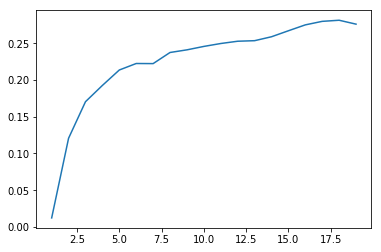

In [6]:
plt.plot(num_recs, np.mean(allctr, axis=0))

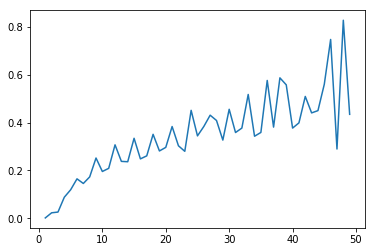

In [14]:
plt.plot(num_recs, allctr[3])